This exercise will be using the [Airbnb dataset](http://insideairbnb.com/get-the-data.html) for NYC called `listings.csv`. You can download it directly [here](http://data.insideairbnb.com/united-states/ny/new-york-city/2021-11-02/visualisations/listings.csv)

a) Produce a Heatmap using the Folium package (you can install it using pip) of the mean listing price per location (lattitude and longitude) over the NYC map. (5 points)

Hints:
1. generate a base map of NYC to plot over: default_location=[40.693943, -73.985880] 
2. generate an HTML file named `index.html` - open it in your browser and you'll see the heatmap 

In [1]:
import pandas as pd
import folium
from folium.plugins import HeatMap

df = pd.read_csv("listings.csv", low_memory = False)
# Get mean price per location
heatData = df[['latitude', 'longitude', 'price']].groupby(['latitude', 'longitude']).mean().reset_index().values.tolist()
heatData

NYCmap = folium.Map(location=[40.693943, -73.985880])
HeatMap(heatData).add_to(NYCmap)
NYCmap.save("index.html")

b) Normalize the price by subtracting the mean and dividing by the standard deviation. Then reproduce the heatmap from a). Comment on any differences you observe. 

In [2]:
df1 = df[['latitude', 'longitude', 'price']].copy()
df1['price'] = df1['price'] - df1['price'].mean() / df1['price'].std()
# Get mean price per location
heatData = df1.groupby(['latitude', 'longitude']).mean().reset_index().values.tolist()

NYCmap = folium.Map(location=[40.693943, -73.985880])
HeatMap(heatData).add_to(NYCmap)
NYCmap.save("index1.html")

Subtle differences acn be noted between the two maps. The edges of the heatmap are more defined after normalization. In many parts of the map, changes in the shape of the extremely red areas can be seen ( with interluding orange and green areas) since the orange and green areas are more clearly defined now.

c) Normalize the original price using sklearn's [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to the interval [0,1]. Then reproduce the Heatmap from a). Comment on any differences you observe.  

In [3]:
from sklearn.preprocessing import MinMaxScaler

df2 = df[['latitude', 'longitude', 'price']].copy()
min_max_scaler = MinMaxScaler()
df2[['price']] = min_max_scaler.fit_transform(df2[['price']]) # Apply MinMaxScaler to price
# Get mean price per location
heatData = df2.groupby(['latitude', 'longitude']).mean().reset_index().values.tolist()

NYCmap = folium.Map(location=[40.693943, -73.985880])
HeatMap(heatData).add_to(NYCmap)
NYCmap.save("index2.html")

Here too, the edges of the heat map have become well defined. When the map is extremely zoomed in, the individual blobs of heat are more defined with clearer edges. The distinctions between the red, yellow and green areas can be clearly noted.

d) Plot a bar chart of the average price (un-normalized) per room type. Briefly comment on the relation between price and room type. 

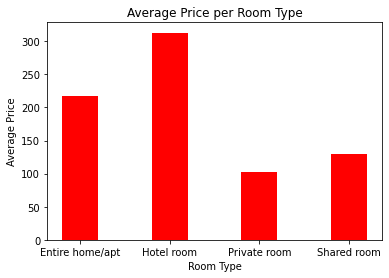

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Group by Room Type and find average price
plt.bar(df.groupby('room_type').price.mean().index, df.groupby('room_type').price.mean().to_list(), color ='red', width = 0.4)
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.title("Average Price per Room Type")
plt.show()

As expected, hotel rooms in NYC are seen to be the most expensive at an average price of 312, followed with a huge margin of difference by entire homes/apartments at 217. Shared and private rooms are comparatively cheaper at 129 and 102 respectively.

e) Plot on the NYC map the top 10 most expensive listings 

In [5]:
# Sort price by descending order, drop duplicate locations to get unique markers and get first ten values
df3 = df.sort_values(by=['price'],ascending=False).drop_duplicates(['latitude', 'longitude']).head(10)[['latitude', 'longitude', 'name', 'price']]
locations = df3[['latitude', 'longitude']].values.tolist()
names = df3['name'].to_list()

NYCmap = folium.Map(location=[40.693943, -73.985880])
for location,name in zip(locations, names):
    folium.Marker(location, popup = name).add_to(NYCmap)
NYCmap.save("10expensive.html")

f) Plot on the NYC map the top 10 most reviewed listings 


In [6]:
# Sort Number of reviews by descending order, drop duplicate locations to get unique markers and get first ten values
df4 = df.sort_values(by=['number_of_reviews'],ascending=False).drop_duplicates(['latitude', 'longitude']).head(10)[['latitude', 'longitude', 'name', 'number_of_reviews']]
locations = df4[['latitude', 'longitude']].values.tolist()
names = df4['name'].to_list()

NYCmap = folium.Map(location=[40.693943, -73.985880])
for location,name in zip(locations, names):
    folium.Marker(location, popup = name).add_to(NYCmap)
NYCmap.save("10reviewed.html")

g) Plot on the NYC map the top 10 most available listings 

In [7]:
# Sort availability by descending order, drop duplicate locations to get unique markers and get first ten values
df5 = df.sort_values(by=['availability_365'],ascending=False).drop_duplicates(['latitude', 'longitude']).head(10)[['latitude', 'longitude', 'name', 'availability_365']]
locations = df5[['latitude', 'longitude']].values.tolist()
names = df5['name'].to_list()

NYCmap = folium.Map(location=[40.693943, -73.985880])
for location,name in zip(locations, names):
    folium.Marker(location, popup = name).add_to(NYCmap)
NYCmap.save("10available.html")

h) Using `longitude`, `latitude`, `price`, and `number_of_reviews`, use Kmeans to create 5 clusters. Plot the points on the NYC map in a color corresponding to their cluster. 


In [8]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import cm, colors

df6 = df[['latitude','longitude', 'price', 'number_of_reviews']].copy()
clusters = KMeans(n_clusters=5, random_state=0).fit(df6) # Using KMeans to create five clusters
df6['cluster'] = clusters.labels_

NYCmap = folium.Map(location=[40.693943, -73.985880])

# Colors for clusters
colors = ['red' , 'blue', 'green', 'yellow', 'black']

# Plots points on map
for lat, lng, price, number_of_reviews, cluster in zip(df6['latitude'], df6['longitude'], df6['price'], df6['number_of_reviews'], df6['cluster']):
    
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        color=colors[cluster-1],
        fill=True,
        fill_color=colors[cluster-1],
        fill_opacity=0.9).add_to(NYCmap)
       
NYCmap.save("Kmeans.html")

i) You should see points in the same cluster all over the map - briefly explain why that is. 

The data points have four components and k-means clustering is done in a four-dimensional space but the clusters are projected in 2D. Because of the projection, points in the same cluster are all over the map. The 2D plot says little about the neighborhood relations in the original, higher-dimensional space.

j) How many clusters would you recommend using instead of 5? Display and interpret either the silhouette scores or the elbow method. 

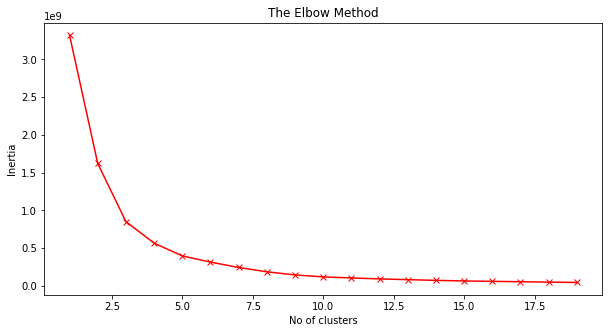

In [9]:
inertias = []

K = range(1,20)

# Elbow method
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init = 50, max_iter = 500)
    kmean.fit(df[['latitude','longitude', 'price', 'number_of_reviews']])
    inertias.append(kmean.inertia_)
plt.figure(figsize=(10,5))
plt.plot(K, inertias, 'bx-', color = 'red')
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

By the Elbow method, it is recommended to use 3 clusters since after that the inertia starts decreasing in a linear fashion.

k) Would you recommend normalizing the price and number of reviews? Briefly explain why.

Yes, it is important to normalize the price and number of reviews since the range of the values in these columns is very high compared to other numeric columns suh as 'No of reviews per month' thereby skewing the distance computation. Normalizing these values will ensure that all columns contribute the same impact on the distance computed for clustering.

l) For all listings of type `Shared room`, plot the dendrogram of the hierarchical clustering generated from `longitude`, `latitude`, and `price`. 

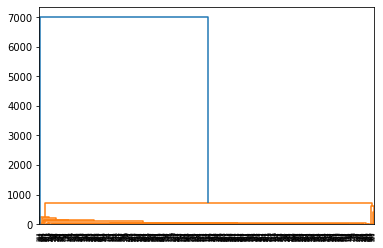

In [10]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

df7 = df[df.room_type == 'Shared room'][['longitude', 'latitude', 'price']]
link = linkage(df7,  metric='euclidean', method='single') # Computing the linkage
dg = dendrogram(link)

m) briefly comment on what you observe from the structure of the dendrogram.  

There seem to be three clusters of data points of which two clusters (Orange links) are drastically different from the other one (Blue link) since they can only be linked at a very large distance value of 7000. Though two clusters of data points are reprensented by the same link colour (orange), there seem to be significant differences between them since they can only be linked at distance 700.<br>
On normalizing the price, it can be seen that the scale of y-axis is now from 0 - 14 instead of 0 - 7000 but the knowledge inferred from the two graphs is the same.   



n) Normalize the `price` as in b) and repeat l) 

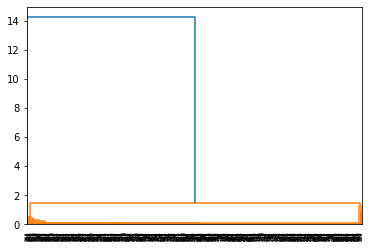

In [11]:
df7['price'] = abs(df7['price'] - df7['price'].mean()) / df7['price'].std()
link = linkage(df7,  metric='euclidean', method='single')# computing the linkage
dg = dendrogram(link)

This exercise will be using the [mnist dataset](http://yann.lecun.com/exdb/mnist/).

a) Using Kmeans, cluster the images using 10 clusters and plot the centroid of each cluster.

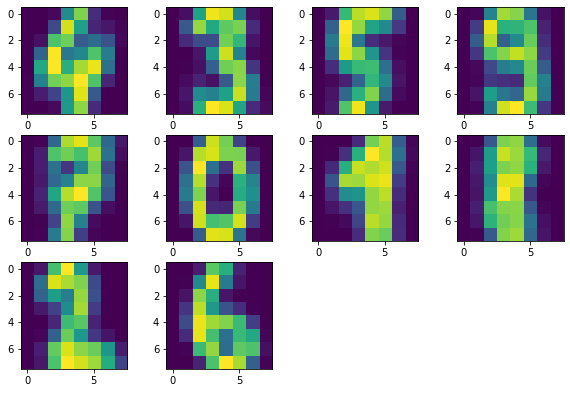

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

data, labels = load_digits(return_X_y = True)
clusters = KMeans(n_clusters = 10, random_state=0).fit(data)
centroids = clusters.cluster_centers_.reshape(10, 8, 8)
plt.figure(figsize = (10, 9))
for i in range(10):
    plt.subplot(4, 4, i+1)
    plt.imshow(centroids[i])

b) what is the disagreement distance between the clustering you created above and the clustering created by the labels attached to each image? Briefly explain what this number means in this context. 

In [13]:
predictions = clusters.labels_

distance = 0
for i in range(len(data)):
    for j in range(i+1, len(data)):
        if predictions[i] == predictions[j] and labels[i] != labels[j]: # If l1 and l2 disagree
            distance += 1
        elif predictions[i] != predictions[j] and labels[i] == labels[j]: # If l1 and l2 disagree 
            distance += 1

print("Disagreement distance = ", distance)
print("It means the algorithm has failed to place two similar points in the same cluster or has placed two different points in the same cluster these many times.")

Disagreement distance =  98043
It means the algorithm has failed to place two similar points in the same cluster or has placed two different points in the same cluster these many times.


c) Download the CIFAR-10 dataset [here](https://www.cs.toronto.edu/~kriz/cifar.html). Open `batch_1` by following the documentation on the web page. Plot a random image from the dataset. 

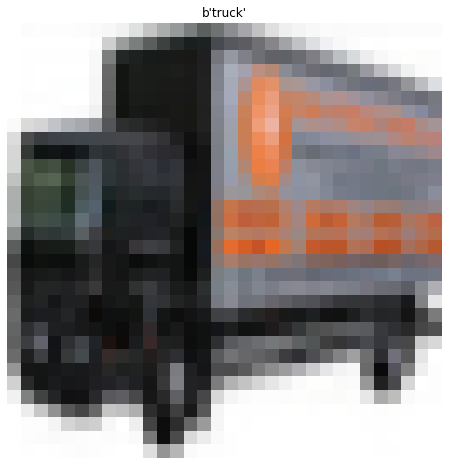

In [14]:
import matplotlib.pyplot as plt
from random import randrange

# Load batch 1 as a dictionary using pickle
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch1 = unpickle("./cifar-10-batches-py/data_batch_1")
meta_data = unpickle("./cifar-10-batches-py/batches.meta")

index = randrange(10000) # Select random image

label_names = meta_data[b'label_names']
image = batch1[b'data'][index]
label = batch1[b'labels'][index] # Get image label

plt.figure(figsize = (15,8))
plt.axis('off')
plt.title(label_names[label])
plt.imshow(image.reshape(3,32,32).transpose(1,2,0)) # Print the image 
plt.show()

d) This image is 32 x 32 pixels and each pixel is a 3-dimensional object of RGB (Red, Green, Blue) intensities. Using the same image as in c), produce an image that only uses 4 colors (the 4 centroids of the clusters obtained by clustering the image itself using Kmeans). 

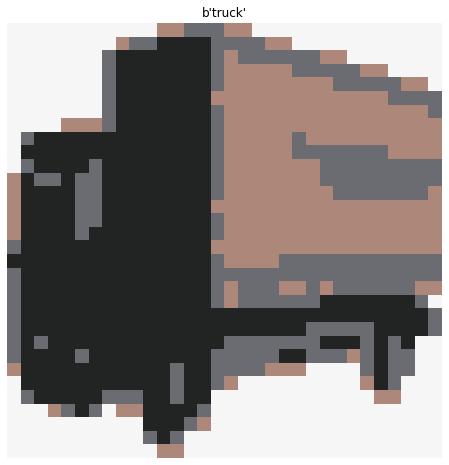

In [15]:
image = batch1[b'data'][index].reshape(3,32,32).transpose(1,2,0)

label_names = meta_data[b'label_names']
label = batch1[b'labels'][index] # Get image label

x, y, z = image.shape
image_2d = image.reshape(x*y, z) # Reshape the image into two dimensions

kmeans_cluster = KMeans(n_clusters=4).fit(image_2d) # Forming four clusters 
cluster_centers = np.uint8(kmeans_cluster.cluster_centers_)
cluster_labels = kmeans_cluster.labels_

plt.figure(figsize = (15,8))
plt.axis('off')
plt.title(label_names[label])
plt.imshow(cluster_centers[cluster_labels].reshape(x, y, z)) # Print image using only the colors of the centroids

e) Write a function that applies this transformation to the entire dataset for any number K of colors. 

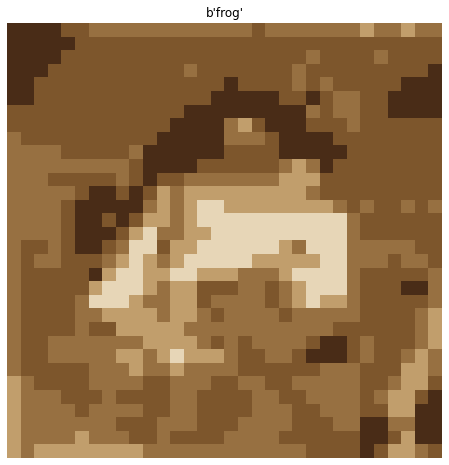

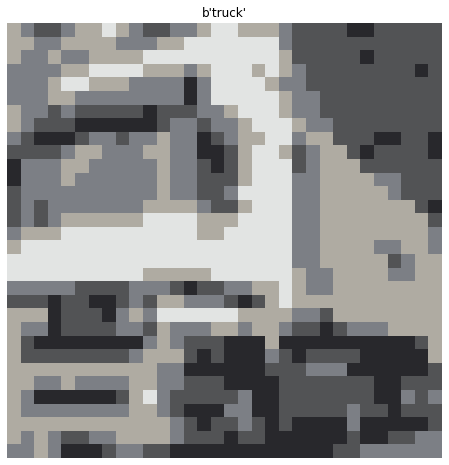

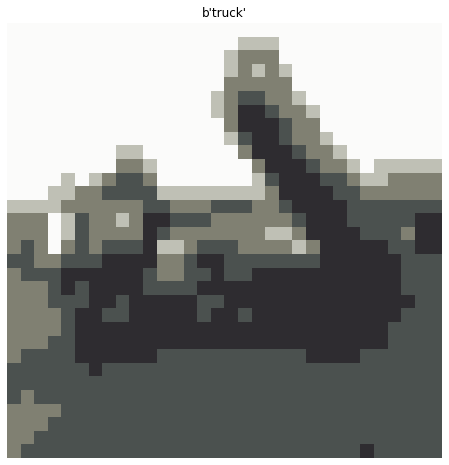

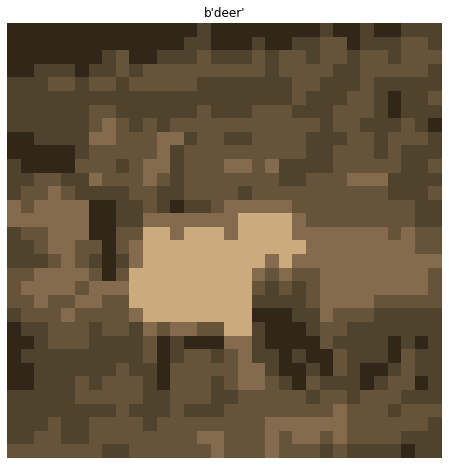

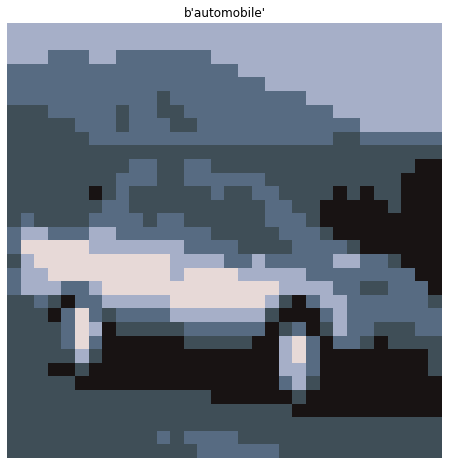

In [16]:
def imageSegmentation(batch, k): # Prints each transformed image of the batch
    
    images = batch[b'data']
    for i in range(5): # Transforms and prints five images. Set to images.shape[0] to apply to entire batch  
        
        image = images[i].reshape(3,32,32).transpose(1,2,0)
        
        label_names = meta_data[b'label_names']
        label = batch[b'labels'][i]

        x, y, z = image.shape
        image_2d = image.reshape(x*y, z)

        kmeans_cluster = KMeans(n_clusters=k).fit(image_2d)
        cluster_centers = np.uint8(kmeans_cluster.cluster_centers_)
        cluster_labels = kmeans_cluster.labels_

        plt.figure(figsize = (15,8))
        plt.axis('off')
        plt.title(label_names[label])
        plt.imshow(cluster_centers[cluster_labels].reshape(x, y, z))
        
imageSegmentation(batch1, 5) # Input : batch, number of clusters